In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [14]:
%matplotlib inline

In [15]:
df = pd.read_csv('sdn-ddos-tcp-syn-dataset.csv')

In [16]:
df.head()

,frame number,eth src,eth dst,eth type,ip hdr_len,ip len,ip id,ip flags,ip ttl,ip proto,...,tcp ack,tcp hdr_len,tcp flags,tcp window_size_value,tcp window_size,tcp payload,tcp analysis.bytes_in_flight,tcp analysis.push_bytes_sent,frame len,label
0,1,00:00:00:00:00:01,00:00:00:00:00:19,0x00000800,20.0,67.0,0x00000001,0x00000000,64.0,6.0,...,0.0,20.0,0x00000002,8192.0,8192.0,79:6f:75:20:61:72:65:20:75:6e:64:65:72:20:61:2...,28.0,27.0,81,ddos
1,2,00:00:00:00:00:01,00:00:00:00:00:19,0x00000800,20.0,67.0,0x00000001,0x00000000,64.0,6.0,...,0.0,20.0,0x00000002,8192.0,8192.0,79:6f:75:20:61:72:65:20:75:6e:64:65:72:20:61:2...,28.0,27.0,81,ddos
2,3,00:00:00:00:00:01,00:00:00:00:00:19,0x00000800,20.0,67.0,0x00000001,0x00000000,64.0,6.0,...,0.0,20.0,0x00000002,8192.0,8192.0,79:6f:75:20:61:72:65:20:75:6e:64:65:72:20:61:2...,28.0,27.0,81,ddos
3,4,00:00:00:00:00:01,00:00:00:00:00:19,0x00000800,20.0,67.0,0x00000001,0x00000000,64.0,6.0,...,0.0,20.0,0x00000002,8192.0,8192.0,79:6f:75:20:61:72:65:20:75:6e:64:65:72:20:61:2...,28.0,27.0,81,ddos
4,5,00:00:00:00:00:01,00:00:00:00:00:19,0x00000800,20.0,67.0,0x00000001,0x00000000,64.0,6.0,...,0.0,20.0,0x00000002,8192.0,8192.0,79:6f:75:20:61:72:65:20:75:6e:64:65:72:20:61:2...,28.0,27.0,81,ddos


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536950 entries, 0 to 1536949
Data columns (total 28 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   frame number                  1536950 non-null  int64  
 1   eth src                       1536950 non-null  object 
 2   eth dst                       1536950 non-null  object 
 3   eth type                      1536950 non-null  object 
 4   ip hdr_len                    1535294 non-null  float64
 5   ip len                        1535294 non-null  float64
 6   ip id                         1535294 non-null  object 
 7   ip flags                      1535294 non-null  object 
 8   ip ttl                        1535294 non-null  float64
 9   ip proto                      1535294 non-null  float64
 10  ip src                        1535294 non-null  object 
 11  ip dst                        1535294 non-null  object 
 12  tcp src port                

In [18]:
df = df.drop_duplicates()
df = df.dropna()


In [19]:
df['label'].value_counts()

label
benign    418816
ddos      115115
Name: count, dtype: int64

C:\Users\akisnoobotrolis\AppData\Local\Temp\ipykernel_4640\1121576565.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label',data=df,palette='hls')


<Axes: xlabel='label', ylabel='count'>

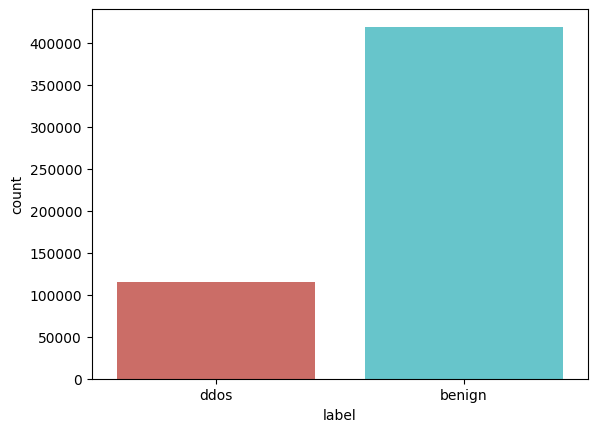

In [20]:
sns.countplot(x='label',data=df,palette='hls')

In [21]:
df= pd.get_dummies(df, columns=["label"])
df.drop(['label_benign'],axis=1,inplace=True)
df

,frame number,eth src,eth dst,eth type,ip hdr_len,ip len,ip id,ip flags,ip ttl,ip proto,...,tcp ack,tcp hdr_len,tcp flags,tcp window_size_value,tcp window_size,tcp payload,tcp analysis.bytes_in_flight,tcp analysis.push_bytes_sent,frame len,label_ddos
0,1,00:00:00:00:00:01,00:00:00:00:00:19,0x00000800,20.0,67.0,0x00000001,0x00000000,64.0,6.0,...,0.0,20.0,0x00000002,8192.0,8192.0,79:6f:75:20:61:72:65:20:75:6e:64:65:72:20:61:2...,28.0,27.0,81,True
1,2,00:00:00:00:00:01,00:00:00:00:00:19,0x00000800,20.0,67.0,0x00000001,0x00000000,64.0,6.0,...,0.0,20.0,0x00000002,8192.0,8192.0,79:6f:75:20:61:72:65:20:75:6e:64:65:72:20:61:2...,28.0,27.0,81,True
2,3,00:00:00:00:00:01,00:00:00:00:00:19,0x00000800,20.0,67.0,0x00000001,0x00000000,64.0,6.0,...,0.0,20.0,0x00000002,8192.0,8192.0,79:6f:75:20:61:72:65:20:75:6e:64:65:72:20:61:2...,28.0,27.0,81,True
3,4,00:00:00:00:00:01,00:00:00:00:00:19,0x00000800,20.0,67.0,0x00000001,0x00000000,64.0,6.0,...,0.0,20.0,0x00000002,8192.0,8192.0,79:6f:75:20:61:72:65:20:75:6e:64:65:72:20:61:2...,28.0,27.0,81,True
4,5,00:00:00:00:00:01,00:00:00:00:00:19,0x00000800,20.0,67.0,0x00000001,0x00000000,64.0,6.0,...,0.0,20.0,0x00000002,8192.0,8192.0,79:6f:75:20:61:72:65:20:75:6e:64:65:72:20:61:2...,28.0,27.0,81,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536933,1421827,00:00:00:00:00:01,00:00:00:00:00:19,0x00000800,20.0,67.0,0x00000001,0x00000000,64.0,6.0,...,0.0,20.0,0x00000002,8192.0,8192.0,79:6f:75:20:61:72:65:20:75:6e:64:65:72:20:61:2...,28.0,27.0,81,False
1536936,1421830,00:00:00:00:00:01,00:00:00:00:00:19,0x00000800,20.0,67.0,0x00000001,0x00000000,64.0,6.0,...,0.0,20.0,0x00000002,8192.0,8192.0,79:6f:75:20:61:72:65:20:75:6e:64:65:72:20:61:2...,28.0,27.0,81,False
1536939,1421833,00:00:00:00:00:01,00:00:00:00:00:19,0x00000800,20.0,67.0,0x00000001,0x00000000,64.0,6.0,...,0.0,20.0,0x00000002,8192.0,8192.0,79:6f:75:20:61:72:65:20:75:6e:64:65:72:20:61:2...,28.0,27.0,81,False
1536942,1421836,00:00:00:00:00:01,00:00:00:00:00:19,0x00000800,20.0,67.0,0x00000001,0x00000000,64.0,6.0,...,0.0,20.0,0x00000002,8192.0,8192.0,79:6f:75:20:61:72:65:20:75:6e:64:65:72:20:61:2...,28.0,27.0,81,False


In [22]:
import ipaddress
df['ip src'] = df['ip src'].apply(lambda x: int(ipaddress.IPv4Address(x)))
df['ip dst'] = df['ip dst'].apply(lambda x: int(ipaddress.IPv4Address(x)))

In [23]:
def hex_to_binary(hex_string):
    binary_string = ''
    for hex_char in hex_string.split(':'):
        binary_string += format(int(hex_char, 16), '04b')
    return binary_string

In [24]:
filtered_df = pd.DataFrame()
for column in df.columns:
    if df[column].value_counts().count() > 1:
        print(column, df[column].unique())
        filtered_df[column] = df[column].copy()



frame number [      1       2       3 ... 1421833 1421836 1421841]
ip src [167837967 167837953 167837966 167837958 167837964 167837962 167837952
 167837954 167837955 167837965 167837963 167837960 167837956 167837961
 167837957 167837959]
tcp src port [44284. 48820. 27506. ...  8862.  5582. 18556.]
tcp stream [0.00000e+00 1.00000e+00 2.00000e+00 ... 4.18815e+05 4.18816e+05
 4.18817e+05]
tcp analysis.push_bytes_sent [ 27.  54.  81. 108. 135. 162.]
label_ddos [ True False]


In [25]:
filtered_df

,frame number,ip src,tcp src port,tcp stream,tcp analysis.push_bytes_sent,label_ddos
0,1,167837967,44284.0,0.0,27.0,True
1,2,167837953,48820.0,1.0,27.0,True
2,3,167837966,27506.0,2.0,27.0,True
3,4,167837958,61849.0,3.0,27.0,True
4,5,167837967,65005.0,4.0,27.0,True
...,...,...,...,...,...,...
1536933,1421827,167837957,5060.0,418813.0,27.0,False
1536936,1421830,167837953,29703.0,418814.0,27.0,False
1536939,1421833,167837953,29642.0,418815.0,27.0,False
1536942,1421836,167837955,16328.0,418816.0,27.0,False


In [26]:
correlation_matrix = filtered_df.corr()
print(correlation_matrix)

                              frame number    ip src  tcp src port  \
frame number                      1.000000 -0.001200      0.002555   
ip src                           -0.001200  1.000000     -0.001700   
tcp src port                      0.002555 -0.001700      1.000000   
tcp stream                        0.995444 -0.001076      0.002763   
tcp analysis.push_bytes_sent     -0.185854  0.001722     -0.000714   
label_ddos                       -0.570200  0.000855      0.000066   

                              tcp stream  tcp analysis.push_bytes_sent  \
frame number                    0.995444                     -0.185854   
ip src                         -0.001076                      0.001722   
tcp src port                    0.002763                     -0.000714   
tcp stream                      1.000000                     -0.200379   
tcp analysis.push_bytes_sent   -0.200379                      1.000000   
label_ddos                     -0.529152                      0.3

<Axes: >

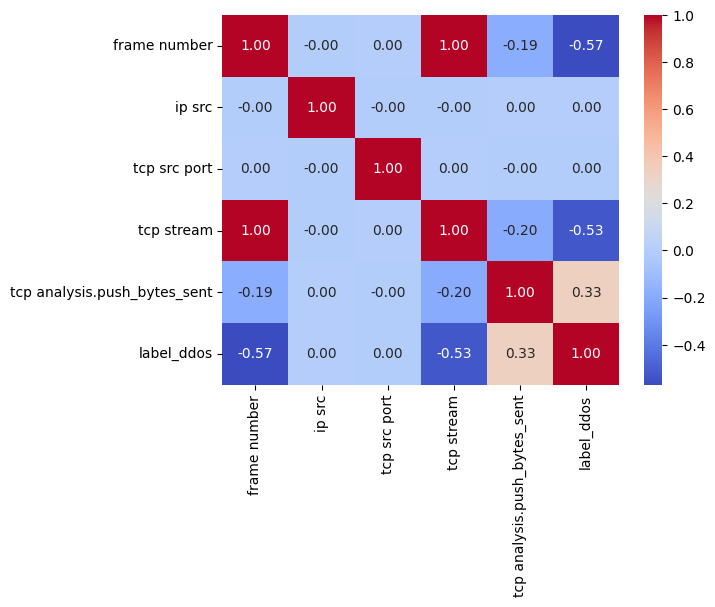

In [27]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [29]:
x=filtered_df.drop(['label_ddos'],axis=1)
y=filtered_df['label_ddos']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

Accuracy is 99.99% for n = 10
Accuracy is 100.00% for n = 20
Accuracy is 100.00% for n = 30
Accuracy is 100.00% for n = 40
Accuracy is 100.00% for n = 50
Accuracy is 100.00% for n = 60
Accuracy is 100.00% for n = 70
Accuracy is 100.00% for n = 80
Accuracy is 100.00% for n = 90


Text(0.5, 1.0, 'Random Forest Accuracy vs. Number of Trees')

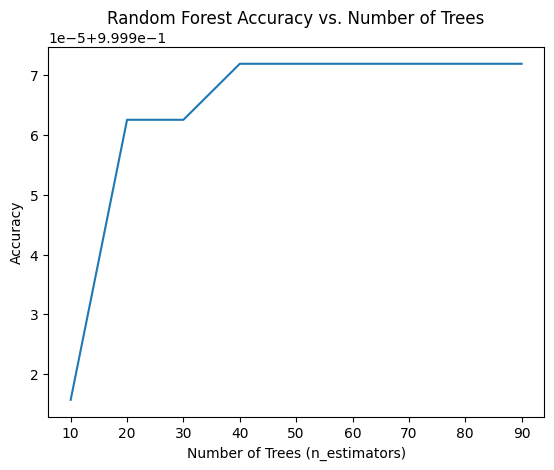

In [31]:
accuracies = []
for i in range(10, 100, 10):  
    classifier = RandomForestClassifier(n_estimators=i, random_state=101)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy is {accuracy*100:.2f}% for n = {i}")


plt.plot(range(10, 100, 10), accuracies)
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. Number of Trees')


In [33]:

refiltered_df = filtered_df.drop(['ip src'], axis=1).copy()


In [34]:
x1=refiltered_df.drop(['label_ddos'],axis=1)
y1=refiltered_df['label_ddos']

In [35]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.20, random_state=101)

Accuracy is 100.00% for n = 10
Accuracy is 99.99% for n = 20
Accuracy is 100.00% for n = 30
Accuracy is 100.00% for n = 40
Accuracy is 100.00% for n = 50
Accuracy is 100.00% for n = 60
Accuracy is 100.00% for n = 70
Accuracy is 100.00% for n = 80
Accuracy is 100.00% for n = 90


Text(0.5, 1.0, 'Random Forest Accuracy vs. Number of Trees')

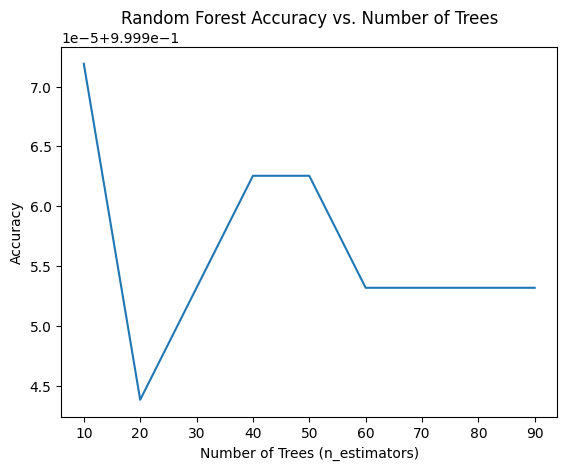

In [36]:
accuracies = []
for i in range(10, 100, 10):  
    classifier = RandomForestClassifier(n_estimators=i, random_state=101)
    classifier.fit(x1_train, y1_train)
    y1_pred = classifier.predict(x1_test)
    accuracy = accuracy_score(y1_test, y1_pred)
    accuracies.append(accuracy)
    print(f"Accuracy is {accuracy*100:.2f}% for n = {i}")


plt.plot(range(10, 100, 10), accuracies)
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. Number of Trees')

Accuracy is 99.96% for n = 1
Accuracy is 99.96% for n = 2
Accuracy is 99.99% for n = 3
Accuracy is 99.99% for n = 4
Accuracy is 99.99% for n = 5
Accuracy is 100.00% for n = 6
Accuracy is 100.00% for n = 7
Accuracy is 100.00% for n = 8
Accuracy is 100.00% for n = 9
Accuracy is 100.00% for n = 10


Text(0.5, 1.0, 'Random Forest Accuracy vs. Number of Trees')

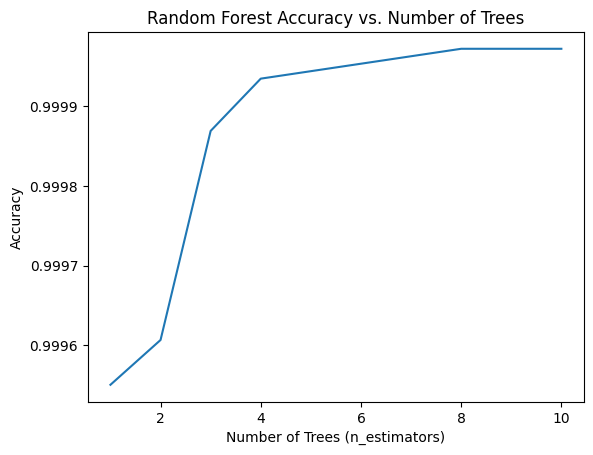

In [39]:
accuracies = []
for i in range(1, 11,1):  
    classifier = RandomForestClassifier(n_estimators=i, random_state=101)
    classifier.fit(x1_train, y1_train)
    y1_pred = classifier.predict(x1_test)
    accuracy = accuracy_score(y1_test, y1_pred)
    accuracies.append(accuracy)
    print(f"Accuracy is {accuracy*100:.2f}% for n = {i}")


plt.plot(range(1, 11, 1), accuracies)
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. Number of Trees')

In [40]:
x1_train.columns

Index(['frame number', 'tcp src port', 'tcp stream',
       'tcp analysis.push_bytes_sent'],
      dtype='object')

In [41]:
classifier = RandomForestClassifier(n_estimators=i, random_state=101)
classifier.fit(x1_train, y1_train)
y1_pred = classifier.predict(x1_test)
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     83543
        True       1.00      1.00      1.00     23244

    accuracy                           1.00    106787
   macro avg       1.00      1.00      1.00    106787
weighted avg       1.00      1.00      1.00    106787



In [48]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=classifier, X=refiltered_df.drop(['label_ddos'], axis=1), y=refiltered_df['label_ddos'], cv=5)
print(f"Cross-Validation Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")





Cross-Validation Accuracy: 0.81 (+/- 0.42)


In [50]:
from scapy.all import sniff
from scapy.layers.inet import TCP, IP
import joblib


In [52]:

def preprocess_packet(packet):
    print(packet)
    return packet


In [53]:


def handle_packet(packet):
    if packet.haslayer(TCP) and packet.haslayer(IP):
        if packet[TCP].flags == 'S':
            processed_packet = preprocess_packet(packet)
            prediction = classifier.predict([processed_packet])[0]
            if prediction == 1:
                print(f"SYN Flood Attack detected from {packet[IP].src}!")


In [ ]:
def extract_features_from_packet(packet):

    features = {}


    features['frame number'] =
    features['tcp src port'] = packet[TCP].sport if packet.haslayer(TCP) else None
    features['tcp stream'] = # extract or calculate tcp stream
    features['tcp analysis.push_bytes_sent'] = # extract push bytes sent


    return features

In [55]:

try:
    sniff(filter="tcp", prn=handle_packet, store=False, promisc=False)
except Exception as e:
    print(f"An error occurred: {e}")

An error occurred: name 'extract_features_from_packet' is not defined
